In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Let's see how heat distributes on a 1-d doughnut if you
TODO:
- [x] Model simple 1d case
- [ ] Add 'heater': non-uniform eq
- [ ] Add some nice math theory formulas via latex
- [ ] Calculate convergence and warn if parameters are non convergent
- [ ] Use some other diff scheme

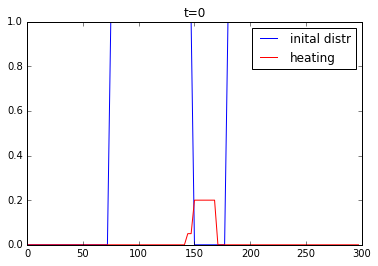

In [518]:

x_size = 100  # dim size
t_steps = 200   # time dim size
dx = 3
dt = 0.1
D =  3 #diff coef
# init func via Heaviside
U0 = np.zeros(x_size)
U0[x_size//4:] = 1.
U0[x_size//2:x_size//2+10]=0.

#init 'heater'
H = np.zeros(x_size)
H[x_size//2-2:x_size//2+7]=0.2
H/=(3*U0+1.)
    
plt.plot(dx*np.arange(len(U0)),U0,label='inital distr')
plt.plot(dx*np.arange(len(H)),H,color='r',label='heating')
plt.title('t=0')
plt.legend()
plt.show()

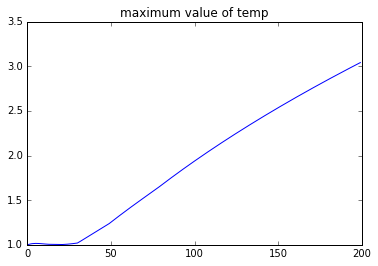

In [519]:
# init with U0
U_ti = U0
U = [U_ti[1:]]
maxs = [max(U_ti)]

for ti in range(1,t_steps):
    U_next = []
    U_ti = np.concatenate(([U_ti[-1]], U_ti, [U_ti[0]] ))    
    for xi in range(1,x_size):
        # pad torus-like
        # step!
        tt = dt/dx* D*( U_ti[xi-1] - 2*U_ti[xi] +U_ti[xi+1] ) + U_ti[xi] + dt*H[xi]
        U_next.append(tt)
    U_ti = np.array(U_next)
    maxs.append(max(U_ti))

    #print(max(U_ti),U_ti.shape)
    U.append(U_ti)
plt.plot(maxs)
plt.title('maximum value of temp')
    

In [520]:
U = np.array(U)
print(U)

[[0.         0.         0.         ... 1.         1.         1.        ]
 [0.1        0.         0.         ... 1.         1.         1.        ]
 [0.18       0.01       0.         ... 1.         1.         0.91      ]
 ...
 [0.47453003 0.41150507 0.35073606 ... 0.66119251 0.60096362 0.53822571]
 [0.4745971  0.41173066 0.35110455 ... 0.66080542 0.60071272 0.53812993]
 [0.47466374 0.41195469 0.35147057 ... 0.66042111 0.60046371 0.53803493]]


(200, 99)


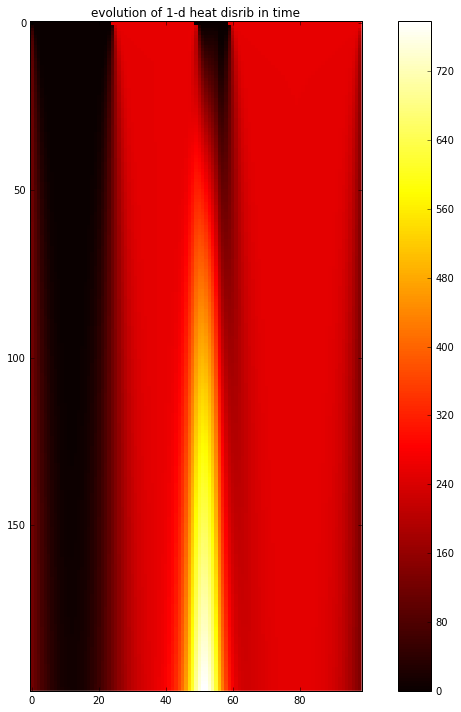

In [521]:
U=np.array(U*256)
print(U.shape)
f,ax = plt.subplots(1,1,figsize=(13,12))
ff = ax.imshow(U.astype(np.int),cmap='hot',interpolation='none')
f.colorbar(ff,ax=ax)
plt.title('evolution of 1-d heat disrib in time.')
